In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [73]:
df = pd.read_csv('Datasets/housing_clean_2/housing_clean_2.csv')

In [74]:
df_cleaned = df.dropna()
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28948 entries, 0 to 29203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       28948 non-null  int64  
 1   price            28948 non-null  int64  
 2   space            28948 non-null  float64
 3   room             28948 non-null  int64  
 4   bedroom          28948 non-null  int64  
 5   furniture        28948 non-null  int64  
 6   latitude         28948 non-null  float64
 7   longitude        28948 non-null  float64
 8   city_area        28948 non-null  object 
 9   floor            28948 non-null  int64  
 10  max_floor        28948 non-null  int64  
 11  apartment_type   28948 non-null  object 
 12  renovation_type  28948 non-null  object 
 13  balcony          28948 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.3+ MB
None


**Checking the skewness of Dependent variable**

In [75]:
df_cleaned['price'].skew()

163.73685698632625

In [76]:
print(df_cleaned['price'].quantile(0.10))
print(df_cleaned['price'].quantile(0.90))

111340.00000000006
529289.9999999998


In [77]:
df_cleaned["price"] = np.where(df_cleaned["price"] >529290, 529290,df_cleaned['price'])
print(df_cleaned['price'].skew())

0.7706075708673005


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
corr = df_cleaned.corr()
print(corr)

            Unnamed: 0     price     space      room   bedroom  furniture  \
Unnamed: 0    1.000000 -0.042763 -0.032834 -0.028346 -0.022272  -0.028717   
price        -0.042763  1.000000  0.778138  0.615348  0.576233   0.144497   
space        -0.032834  0.778138  1.000000  0.800752  0.716000   0.019151   
room         -0.028346  0.615348  0.800752  1.000000  0.852709   0.004082   
bedroom      -0.022272  0.576233  0.716000  0.852709  1.000000   0.010195   
furniture    -0.028717  0.144497  0.019151  0.004082  0.010195   1.000000   
latitude      0.003771 -0.190264 -0.100549 -0.052989 -0.049365  -0.043359   
longitude     0.015862 -0.119669 -0.060222 -0.030511 -0.029009  -0.036047   
floor        -0.001490  0.061361  0.042611  0.015639  0.031829  -0.007262   
max_floor     0.008985  0.069064 -0.014292 -0.045179 -0.023662  -0.012527   
balcony       0.022182  0.039384  0.027064  0.049762  0.062160   0.024137   

            latitude  longitude     floor  max_floor   balcony  
Unnamed: 0

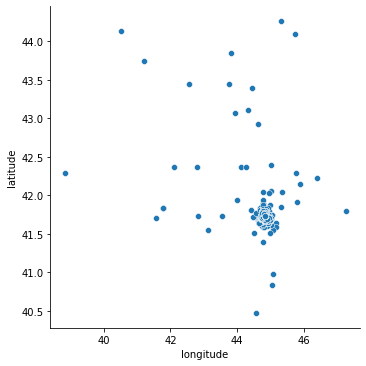

In [79]:
import seaborn as sns
sns.relplot(x='longitude',y='latitude',data=df_cleaned)

**we can safely drop longitude and latitude**

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

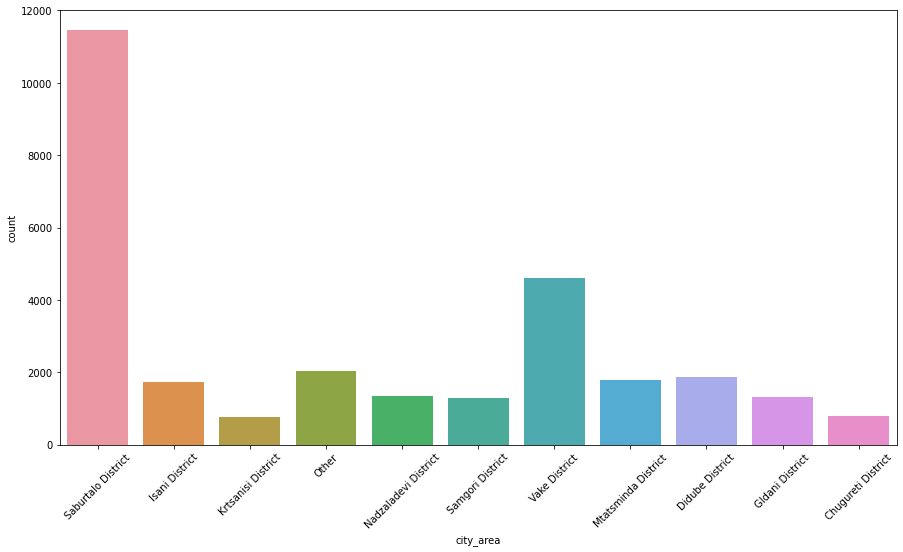

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
sns.countplot(x='city_area',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

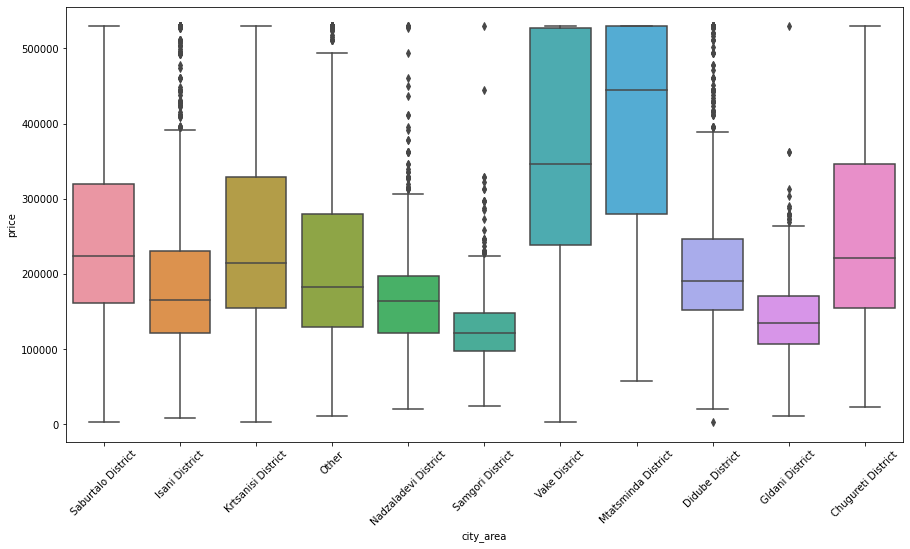

In [81]:
plt.figure(figsize = (15,8))
sns.boxplot(x='city_area',y='price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

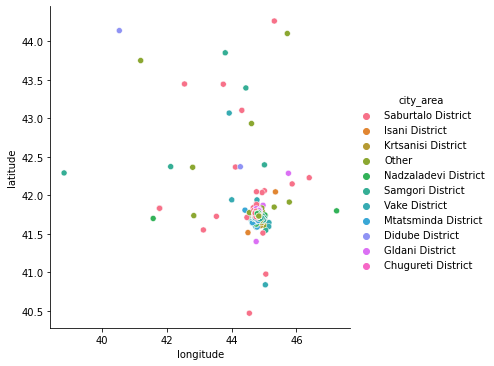

In [82]:
sns.relplot(x='longitude',y='latitude',hue='city_area',data=df_cleaned)

In [83]:
print(df_cleaned.city_area.unique())

['Saburtalo District' 'Isani District' 'Krtsanisi District' 'Other'
 'Nadzaladevi District' 'Samgori District' 'Vake District'
 'Mtatsminda District' 'Didube District' 'Gldani District'
 'Chugureti District']


In [84]:
mean_sd = df_cleaned['price'].loc[df['city_area'] == 'Saburtalo District'].mean()

<AxesSubplot:xlabel='apartment_type', ylabel='price'>

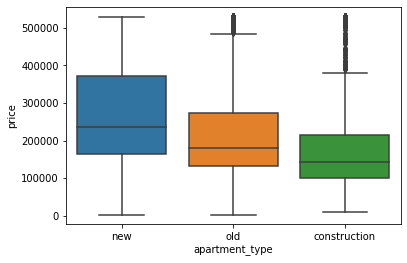

In [85]:
sns.boxplot(x='apartment_type',y='price',data=df_cleaned)

In [86]:
print(mean_sd)

255919.83142632543


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

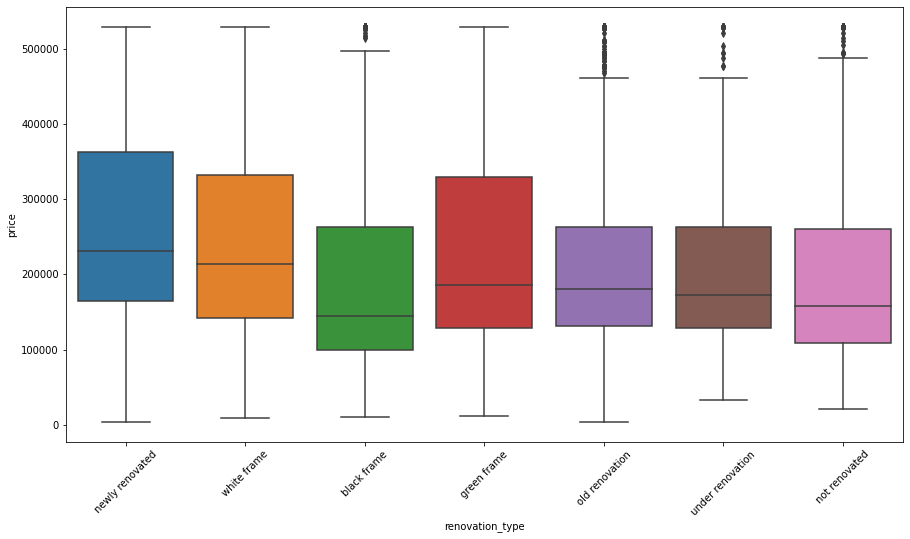

In [87]:
plt.figure(figsize = (15,8))
sns.boxplot(x='renovation_type',y='price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

[None, None, None, None, None, None]

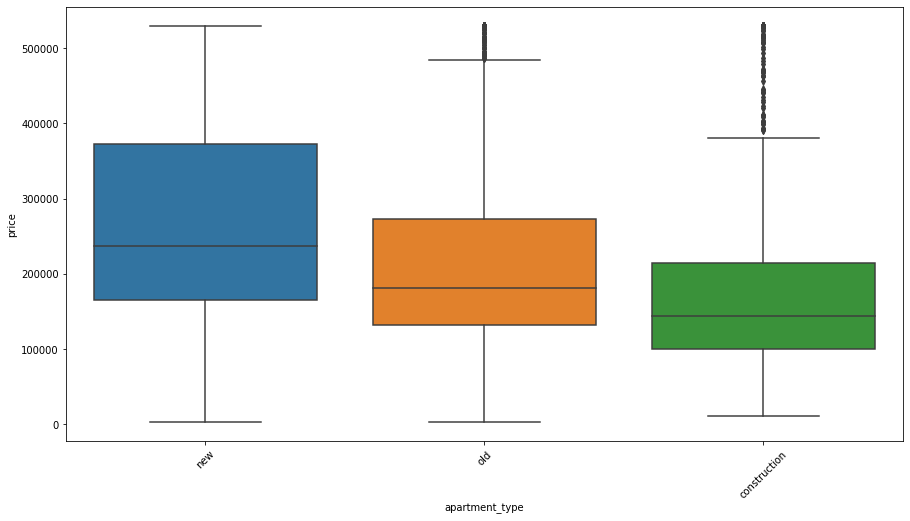

In [88]:
plt.figure(figsize = (15,8))
sns.boxplot(x='apartment_type',y='price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [89]:
print(df_cleaned['price'].loc[df['apartment_type'] == 'old'].describe())
print(df_cleaned['price'].loc[df['apartment_type'] == 'old'].skew())

count      8448.000000
mean     221987.752131
std      124928.056244
min        3300.000000
25%      131800.000000
50%      181200.000000
75%      273500.000000
max      529290.000000
Name: price, dtype: float64
1.1188034461030754


In [90]:
print(df_cleaned['price'].loc[df['apartment_type'] == 'construction'].describe())
print(df_cleaned['price'].loc[df['apartment_type'] == 'construction'].skew())
mean_apt_cons_type = df_cleaned['price'].loc[df['apartment_type'] == 'construction'].mean()
print(mean_apt_cons_type)
quant_90 = df_cleaned['price'].loc[df['apartment_type'] == 'construction'].quantile(0.90)
print(quant_90)

count      1183.000000
mean     183623.127642
std      125197.136858
min       10500.000000
25%       99700.000000
50%      143600.000000
75%      214300.000000
max      529290.000000
Name: price, dtype: float64
1.6071043333426998
183623.12764158918
391280.0


In [105]:
 df_cleaned_constype = df_cleaned

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_cleaned_constype.shape

(28948, 14)

[None, None, None, None, None, None]

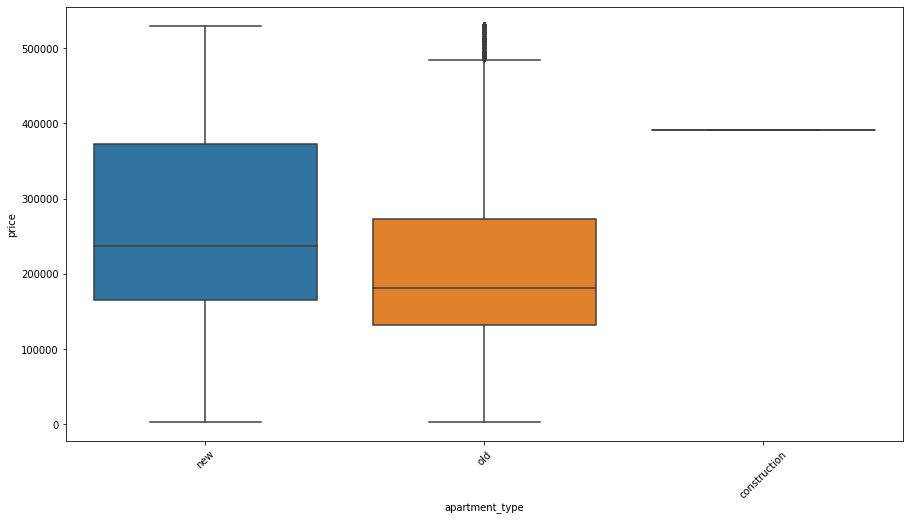

In [110]:
plt.figure(figsize = (15,8))
sns.boxplot(x='apartment_type',y='price',data=df_cleaned_constype)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)